
# Métodos de Clustering: Fundamentos, Hiperparámetros y Aplicaciones

El **clustering** es una técnica de aprendizaje no supervisado que busca agrupar instancias similares sin etiquetas previas.

---

## ¿Por qué usar clustering?

- Descubrir patrones ocultos.
- Agrupar clientes, documentos, regiones, etc.
- Generar etiquetas para tareas posteriores.

---

## Técnicas cubiertas:

1. K-Means
2. DBSCAN
3. Mean Shift
4. Agglomerative Clustering
5. Gaussian Mixture Models (GMM)


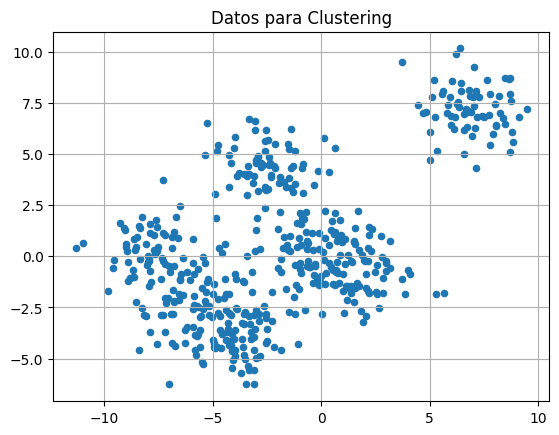

In [7]:

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Crear datos de prueba
X, _ = make_blobs(n_samples=500, centers=7, cluster_std=1.23, random_state=20090630)

plt.scatter(X[:, 0], X[:, 1], s=20)
plt.title("Datos para Clustering")
plt.grid(True)
plt.show()



## 1. K-Means

Agrupa datos minimizando la suma de distancias cuadradas al centroide de cada grupo.

### Fórmula de optimización:
\[
\min \sum_{i=1}^{k} \sum_{x \in C_i} \|x - \mu_i\|^2
\]

### Hiperparámetros:
- `n_clusters`
- `init`
- `max_iter`

### Fortalezas:
- Rápido, eficiente, fácil de entender.

### Desafíos:
- No robusto a outliers.
- Requiere definir `k`.
- Solo funciona bien con clusters esféricos.


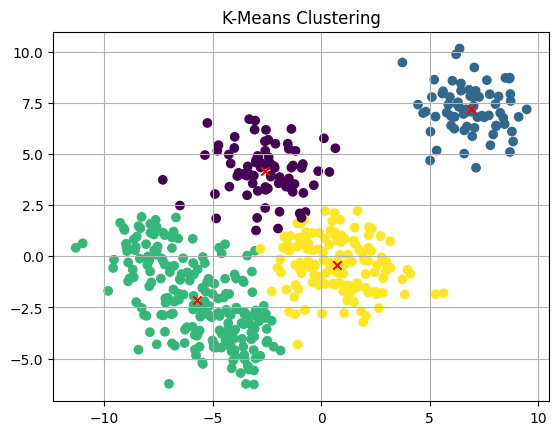

In [8]:

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
plt.title("K-Means Clustering")
plt.grid(True)
plt.show()



## 2. DBSCAN (Density-Based Spatial Clustering)

Agrupa puntos densamente conectados, y marca como ruido los puntos aislados.

### Hiperparámetros:
- `eps`: radio de vecindad
- `min_samples`: número mínimo de vecinos

### Fortalezas:
- Detecta formas arbitrarias.
- No requiere especificar `k`.

### Desafíos:
- Sensible a los parámetros.
- Puede fallar en datos con densidades mixtas.


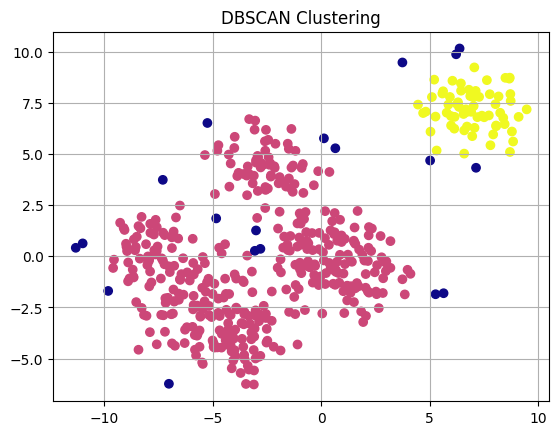

In [9]:

from sklearn.cluster import DBSCAN

db = DBSCAN(eps=1.0, min_samples=5)
y_db = db.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_db, cmap='plasma')
plt.title("DBSCAN Clustering")
plt.grid(True)
plt.show()



## 3. Mean Shift

Agrupa puntos desplazando cada uno hacia zonas de mayor densidad (moda).

### Hiperparámetros:
- `bandwidth`: tamaño de la ventana de análisis (estimable con scikit-learn)

### Fortalezas:
- No requiere definir número de clusters.
- Detecta formas arbitrarias.

### Desafíos:
- Costoso computacionalmente.
- Dificultad para grandes datasets.


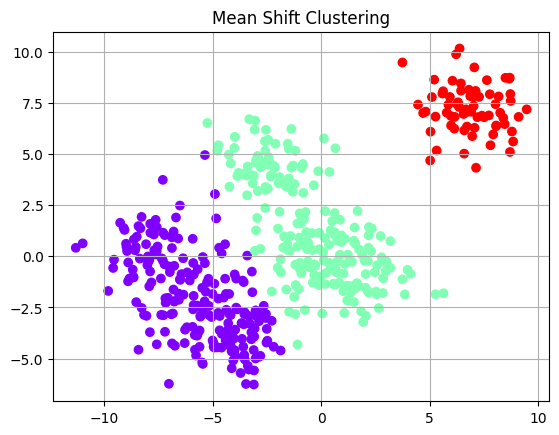

In [10]:

from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = estimate_bandwidth(X, quantile=0.2)
ms = MeanShift(bandwidth=bandwidth)
y_ms = ms.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_ms, cmap='rainbow')
plt.title("Mean Shift Clustering")
plt.grid(True)
plt.show()



## 4. Agglomerative Clustering (Jerárquico)

Une puntos en grupos de forma jerárquica usando una métrica de similitud.

### Hiperparámetros:
- `n_clusters`
- `linkage`: ‘ward’, ‘complete’, ‘average’, ‘single’

### Fortalezas:
- Crea una dendrograma.
- Útil para entender relaciones jerárquicas.

### Desafíos:
- Costoso para grandes datasets.
- Requiere definir el corte del dendrograma.


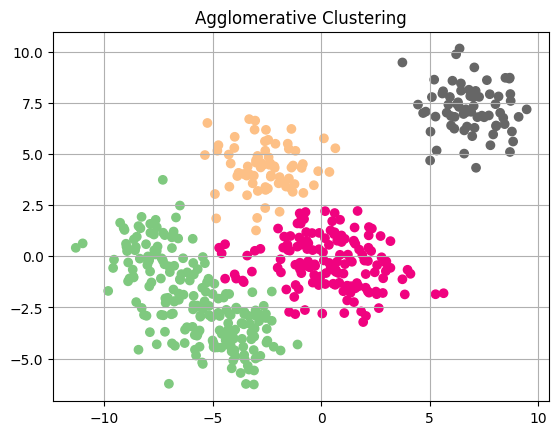

In [11]:

from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=4)
y_agglo = agglo.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_agglo, cmap='Accent')
plt.title("Agglomerative Clustering")
plt.grid(True)
plt.show()



## 5. Gaussian Mixture Models (GMM)

Modelo probabilístico que asume que los datos provienen de una mezcla de distribuciones gaussianas.

### Hiperparámetros:
- `n_components`: número de gaussianas
- `covariance_type`: full, diag, tied, spherical

### Fortalezas:
- Permite solapamientos y probabilidad de pertenencia.
- Más flexible que K-Means.

### Desafíos:
- Puede converger a soluciones locales.
- Asume distribuciones gaussianas.


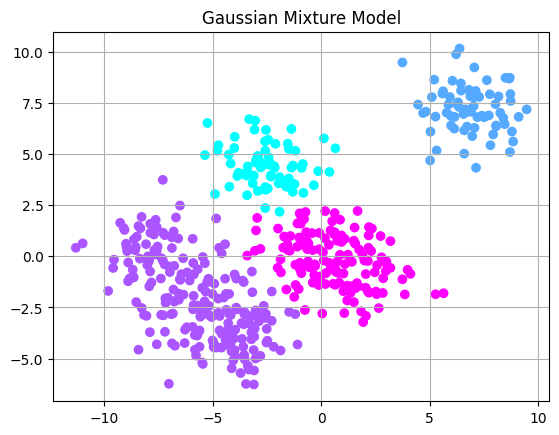

In [12]:

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4, random_state=42)
y_gmm = gmm.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_gmm, cmap='cool')
plt.title("Gaussian Mixture Model")
plt.grid(True)
plt.show()



## Ejercicio Final

1. Aplica los cinco métodos a otro conjunto de datos (por ejemplo, `make_moons`, `make_circles`, `load_wine`).
2. Compara visualmente los resultados.
3. ¿Qué método se adapta mejor a cada tipo de estructura?

Explora también métricas como Silhouette Score o Calinski-Harabasz para cuantificar la calidad de los clusters.
